<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/NB_EsperanzaVida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\# **Esperanza de vida.** Indicador nº 46 de la ISO-37120:

De acuerdo con el objetivo principal del presente TFM, se han recopilado datos de la Esperanza de vida de Barcelona a nivel de barrio facilitadas por el Departament d'Estadística i Difusió de Dades. Ajuntament de Barcelona. a traves del portal [Barcelona.cat](https://ajuntament.barcelona.cat/estadistica/castella/Estadistiques_per_temes/Salut/Estat_de_salut/Indicadors_salut_publica/Barris/t39.htm).

## Carga del conjunto de datos


Cargamos en un dataframe los csv obtenidos desde el año 2006 hasta 2019 sobre la esperanza de vida en la ciudad de Barcelona

In [1]:
# Importamos las librerias necesarias
#import requests
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import viridis
import warnings

In [2]:
def cargar_csv(ruta):
    try:
        # Cargar el archivo CSV en un DataFrame de pandas
        dataframe = pd.read_csv(ruta)
        return dataframe
    except Exception as e:
        print("Error al cargar el archivo CSV:", e)
        return None

In [3]:
# Directorio del indicador 1
directorio ='/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Básico/Salud/Indicador_46_EsperanzaVida/'

# Lista de archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Iterar sobre cada archivo CSV y cargarlo en un DataFrame
for archivo in archivos_csv:
    ruta_archivo = os.path.join(directorio, archivo)
    df = cargar_csv(ruta_archivo)
    dfs.append(df)

# Concatenar todos los DataFrames en un solo DataFrame
df_final = pd.concat(dfs, ignore_index=True)

In [4]:
# Mostramos las primeras filas del dataframe
df_final.head()

,Anys_Periode,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre
0,2006-2010,1,Ciutat Vella,1,el Raval,82.6
1,2006-2010,1,Ciutat Vella,2,el Barri Gòtic,84.7
2,2006-2010,1,Ciutat Vella,3,la Barceloneta,83.3
3,2006-2010,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",85.1
4,2006-2010,2,Eixample,5,el Fort Pienc,86.7


In [5]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Anys_Periode    730 non-null    object
 1   Codi_Districte  730 non-null    int64 
 2   Nom_Districte   730 non-null    object
 3   Codi_Barri      730 non-null    int64 
 4   Nom_Barri       730 non-null    object
 5   Nombre          730 non-null    object
dtypes: int64(2), object(4)
memory usage: 34.3+ KB


El dataset se compone de un total de 9 columnas:
*   **Any_Periode:** Intervalo de años en el que se recogieron los datos*   
*   **Codi_Districte:** Codigo del distrito de Barcelona
*   **Nom_Districte:** Nombre del distrito de Barcelona
*   **Codi_Barri:** Codigo del barrio de Barcelona
*   **Nom_Barri:** Nombre del barrio de Barcelona
*   **Nombre:** Cantidad de personas

El dataset tiene un total de 730 filas y no tiene missing-values

En este punto, advertimos que la variable **Nombre**  no se considera númerica, por lo que vamos ha modificar el tipo de la variable a float


In [6]:
# Para manejar errores de conversión utilizaremos 'errors='coerce''
df_final['Nombre'] = pd.to_numeric(df_final['Nombre'], errors='coerce')

# Convertimos la columna a tipo float
df_final['Nombre'] = df_final['Nombre'].astype(float)

# Verificamos el cambio de tipo de dato
print(df_final.dtypes)

Anys_Periode       object
Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Nombre            float64
dtype: object


In [7]:
# Analizamos las variables numericas
df_final.describe()

,Codi_Districte,Codi_Barri,Nombre
count,730.000000,730.000000,692.000000
mean,6.246575,37.000000,83.873266
std,2.790248,21.085755,1.953258
min,1.000000,1.000000,74.700000
25%,4.000000,19.000000,83.000000
50%,7.000000,37.000000,84.200000
75%,8.000000,55.000000,85.100000
max,10.000000,73.000000,88.800000


Analizando cada una de las variables numericas vemos que la variable:
*   **Codi_Districte:** aunque es una variable numerica corresponde con valores categoricos. Por otro lado vemos que puede haber algun valor que no es correcto. Barcelona se compone de 10 distritos, y en cambio como valor maximo nos aparece 99.
*   **Codi_Barri:** aunque es una variable numerica corresponde con valores categoricos. Por otro lado vemos que puede haber algun valor que no es correcto. Barcelona se compone de 73 barrios, y en cambio como valor maximo nos aparece 99
*   **Nombre:** es integra y contiene la información correcta.


In [8]:
# Modificamos el nombre de la variable Nombre a AñosEspVida
df_final = df_final.rename(columns={'Nombre': 'AñosEspVida'})

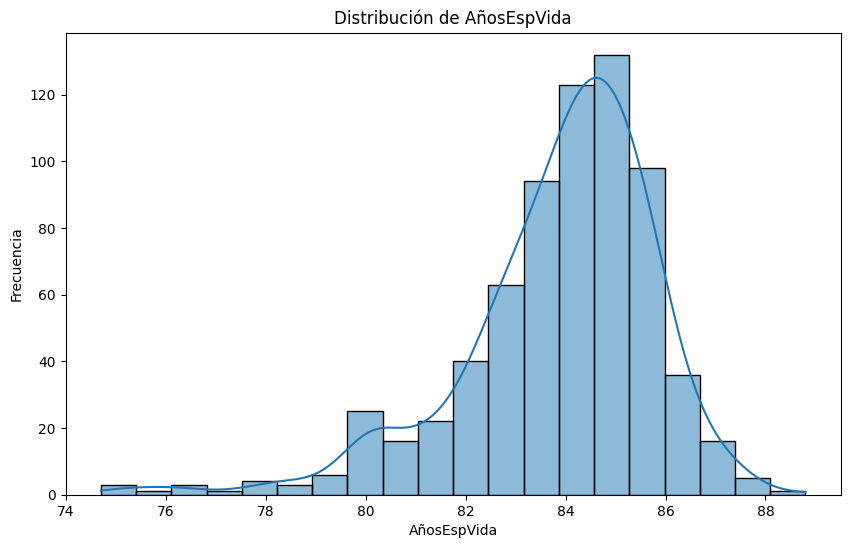

In [9]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['AñosEspVida'], bins=20, kde=True)
plt.title('Distribución de AñosEspVida')
plt.xlabel('AñosEspVida')
plt.ylabel('Frecuencia')
plt.show()

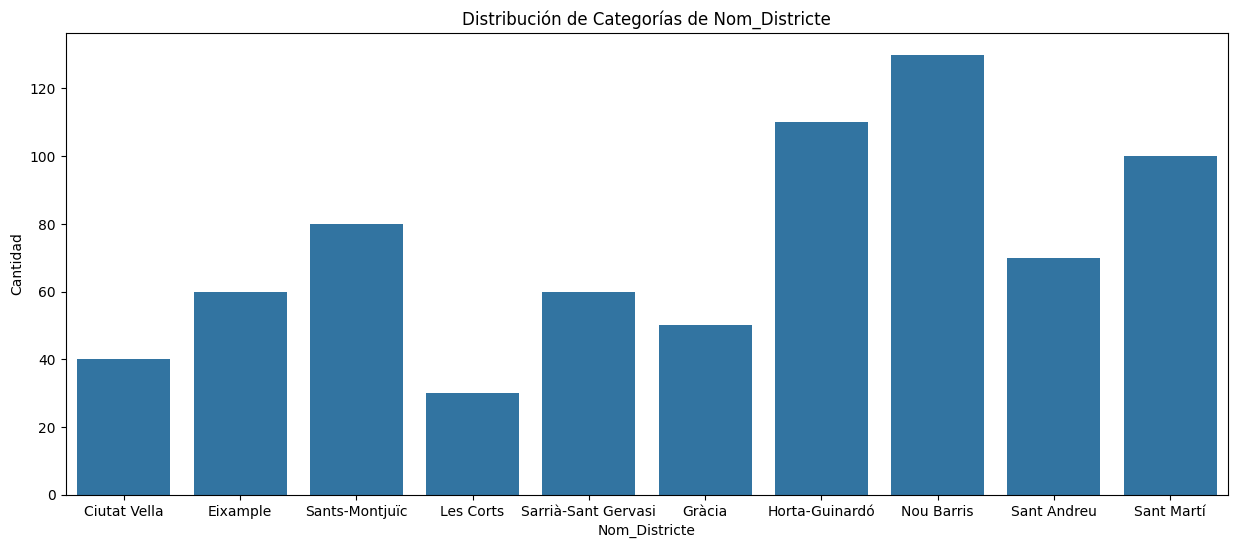

In [10]:
# Visualizamos la distribución de la variable categórica Nom_Districte utilizando un gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Nom_Districte', data=df_final)
plt.title('Distribución de Categorías de Nom_Districte')
plt.xlabel('Nom_Districte')
plt.ylabel('Cantidad')
plt.show()

Barcelona consta de 10 distritos. En este gráfico observamos que el valor "No consta" no se corresponde con ningun nombre de distrito.

Las diferencias entre cantidad entre distritos corresponde a la cantidad de barrios que contiene cada distrito.

## Limpieza de datos

Verificamos que si hay datos faltantes

In [11]:
df_final.isnull().sum()

Anys_Periode       0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
AñosEspVida       38
dtype: int64

In [12]:
# Utilizamos isna() para encontrar los NaN
filas_con_nan = df_final[df_final.isna().any(axis=1)]

# Muestra las filas que contienen NaN
print(filas_con_nan)

    Anys_Periode  Codi_Districte   Nom_Districte  Codi_Barri  \
11     2006-2010               3  Sants-Montjuïc          12   
41     2006-2010               7  Horta-Guinardó          42   
53     2006-2010               8      Nou Barris          54   
55     2006-2010               8      Nou Barris          56   
84     2007-2011               3  Sants-Montjuïc          12   
114    2007-2011               7  Horta-Guinardó          42   
128    2007-2011               8      Nou Barris          56   
157    2008-2012               3  Sants-Montjuïc          12   
187    2008-2012               7  Horta-Guinardó          42   
201    2008-2012               8      Nou Barris          56   
203    2008-2012               9     Sant Andreu          58   
230    2009-2013               3  Sants-Montjuïc          12   
260    2009-2013               7  Horta-Guinardó          42   
274    2009-2013               8      Nou Barris          56   
303    2010-2014               3  Sants-

Se observan 38 filas con valores perdidos. Tal como se describe en las observaciones del dataset, cuando hay NaN, es porque el valor estimado del barrios no es válido (o bien error estándar (SE)>=2 o bien núm. muertos<100).

Antes de abordar los valores NaN, la variable Any_Periode corresponde a un periodo de un lustro. Com queremos referenciar los datos a un año en concreto, se tomará como año el íltimo del lustro, es decir, entre 2006-2010, se adoptara como año 2010


### Adicion de variable Any

In [13]:
# Añadimos una variable nueva 'Any'
df_final['Any']= df_final['Anys_Periode'].str[-4:]

In [14]:
df_final.head()

,Anys_Periode,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,AñosEspVida,Any
0,2006-2010,1,Ciutat Vella,1,el Raval,82.6,2010
1,2006-2010,1,Ciutat Vella,2,el Barri Gòtic,84.7,2010
2,2006-2010,1,Ciutat Vella,3,la Barceloneta,83.3,2010
3,2006-2010,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",85.1,2010
4,2006-2010,2,Eixample,5,el Fort Pienc,86.7,2010


## Creación de .csv

Obtenemos el archivo datosParo.csv con los datos del dataframe resultante

In [15]:
# Guardar el DataFrame en un archivo CSV
df_final.to_csv('/content/drive/MyDrive/UOC/TFM/Datasets definitivos/datos_46_EsperanzaVida.csv', index=False)

## Análisis Exploratorio de Datos (EDA)

Una vez tenemos los datos limpios continuamos con la exploracion inicial de los datos

### Variable continua Años Esperanza  de Vida (AñosEspVida)

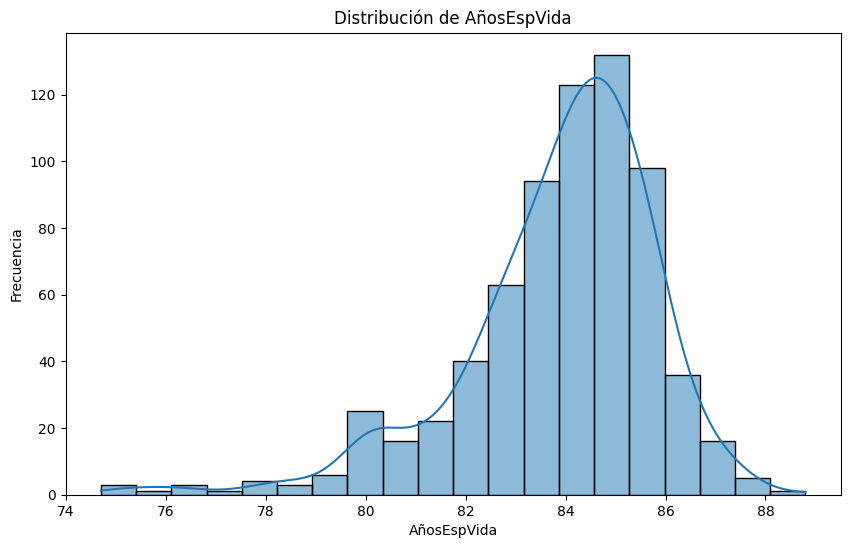

In [16]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['AñosEspVida'], bins=20, kde=True)
plt.title('Distribución de AñosEspVida')
plt.xlabel('AñosEspVida')
plt.ylabel('Frecuencia')
plt.show()

In [17]:
# Agrupamos la variable continua ParadosReg en función de los años
df_anyEspVida = df_final.groupby(['Any','Codi_Districte','Nom_Districte'])['AñosEspVida'].mean().reset_index()

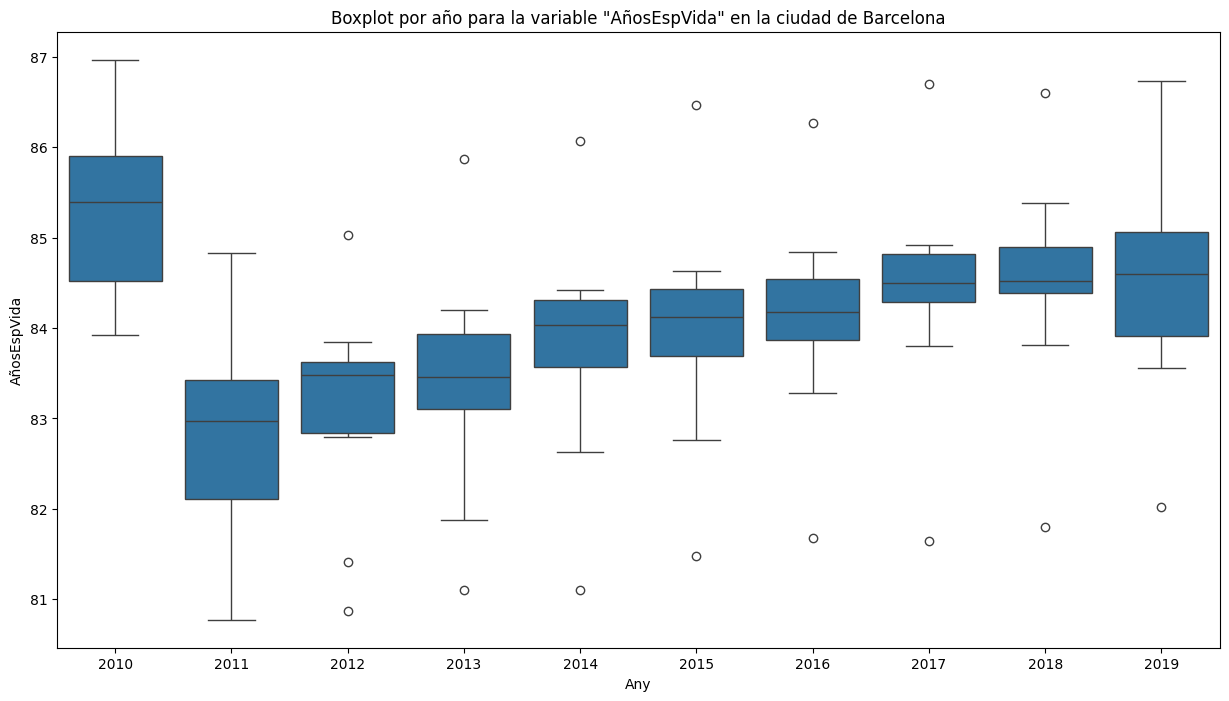

In [18]:
# Crear diagrama de caja para la variable continua "ParadosReg" en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='AñosEspVida', data=df_anyEspVida)
plt.title('Boxplot por año para la variable "AñosEspVida" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

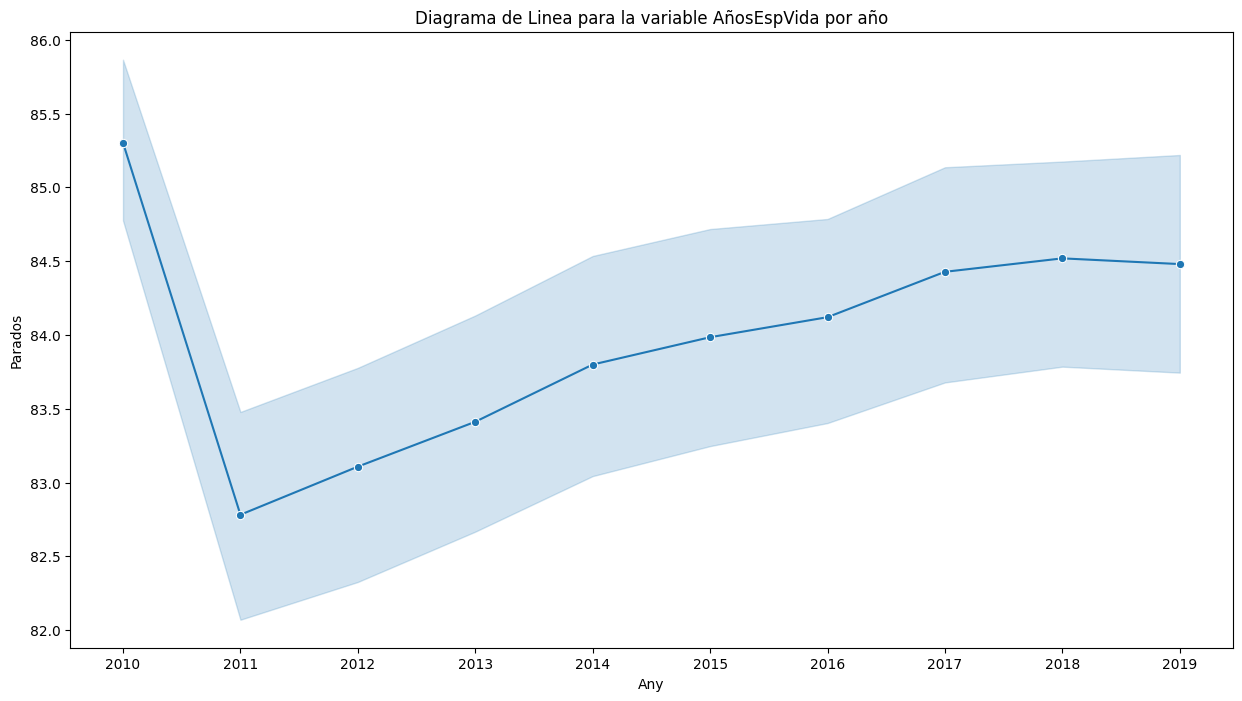

In [19]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_anyEspVida, x='Any', y='AñosEspVida', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable AñosEspVida por año')
plt.xlabel('Any')
plt.ylabel('Parados')

plt.show()

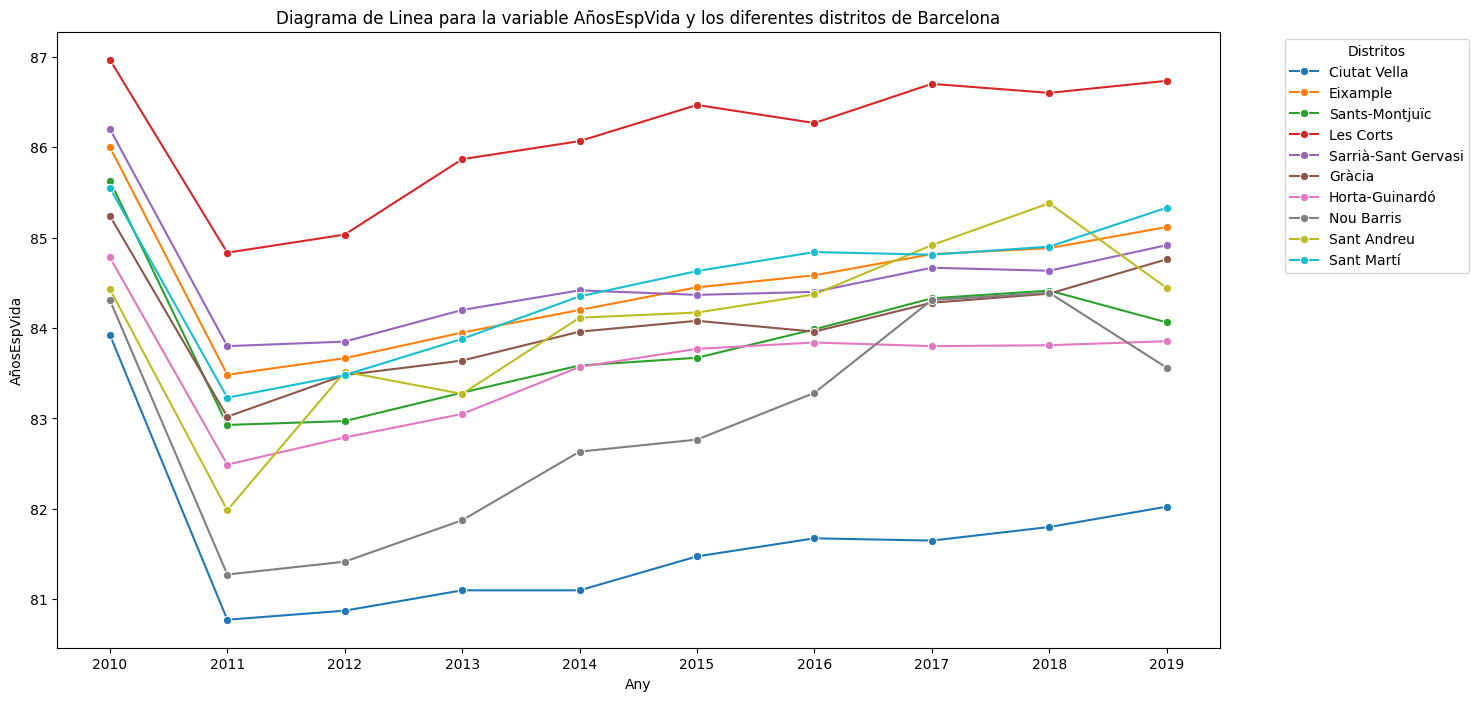

In [20]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))

#Sumamos los parados por distrito
summarized_data = df_anyEspVida.groupby(['Any','Codi_Districte','Nom_Districte'])['AñosEspVida'].sum().reset_index()


sns.lineplot(data=summarized_data, x='Any', y='AñosEspVida', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable AñosEspVida y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('AñosEspVida')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_anyEspVida['Any'].unique())

# Sacamos la leyenda fuera del grafico

plt.show()

## Carga del Shapefile

Cargamos el archivo tipo shape con los 10 distritos de Barcelona

In [21]:
# Cargar el archivo shapefile de los distritos de Barcelona
barcelona_distritos = gpd.read_file("/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp")

# Mostrar información básica sobre el shapefile
barcelona_distritos.head()


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID_V,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568..."


In [22]:
# Convertimos el tipo de valor de la variable distrito a entero
barcelona_distritos['DISTRICTE'] = barcelona_distritos['DISTRICTE'].astype(int)

In [23]:
# Mostramos la nomenclatura para los graficos posteriores
print (df_anyEspVida[['Codi_Districte', 'Nom_Districte']].drop_duplicates().to_string(index=False))

 Codi_Districte       Nom_Districte
              1        Ciutat Vella
              2            Eixample
              3      Sants-Montjuïc
              4           Les Corts
              5 Sarrià-Sant Gervasi
              6              Gràcia
              7      Horta-Guinardó
              8          Nou Barris
              9         Sant Andreu
             10          Sant Martí


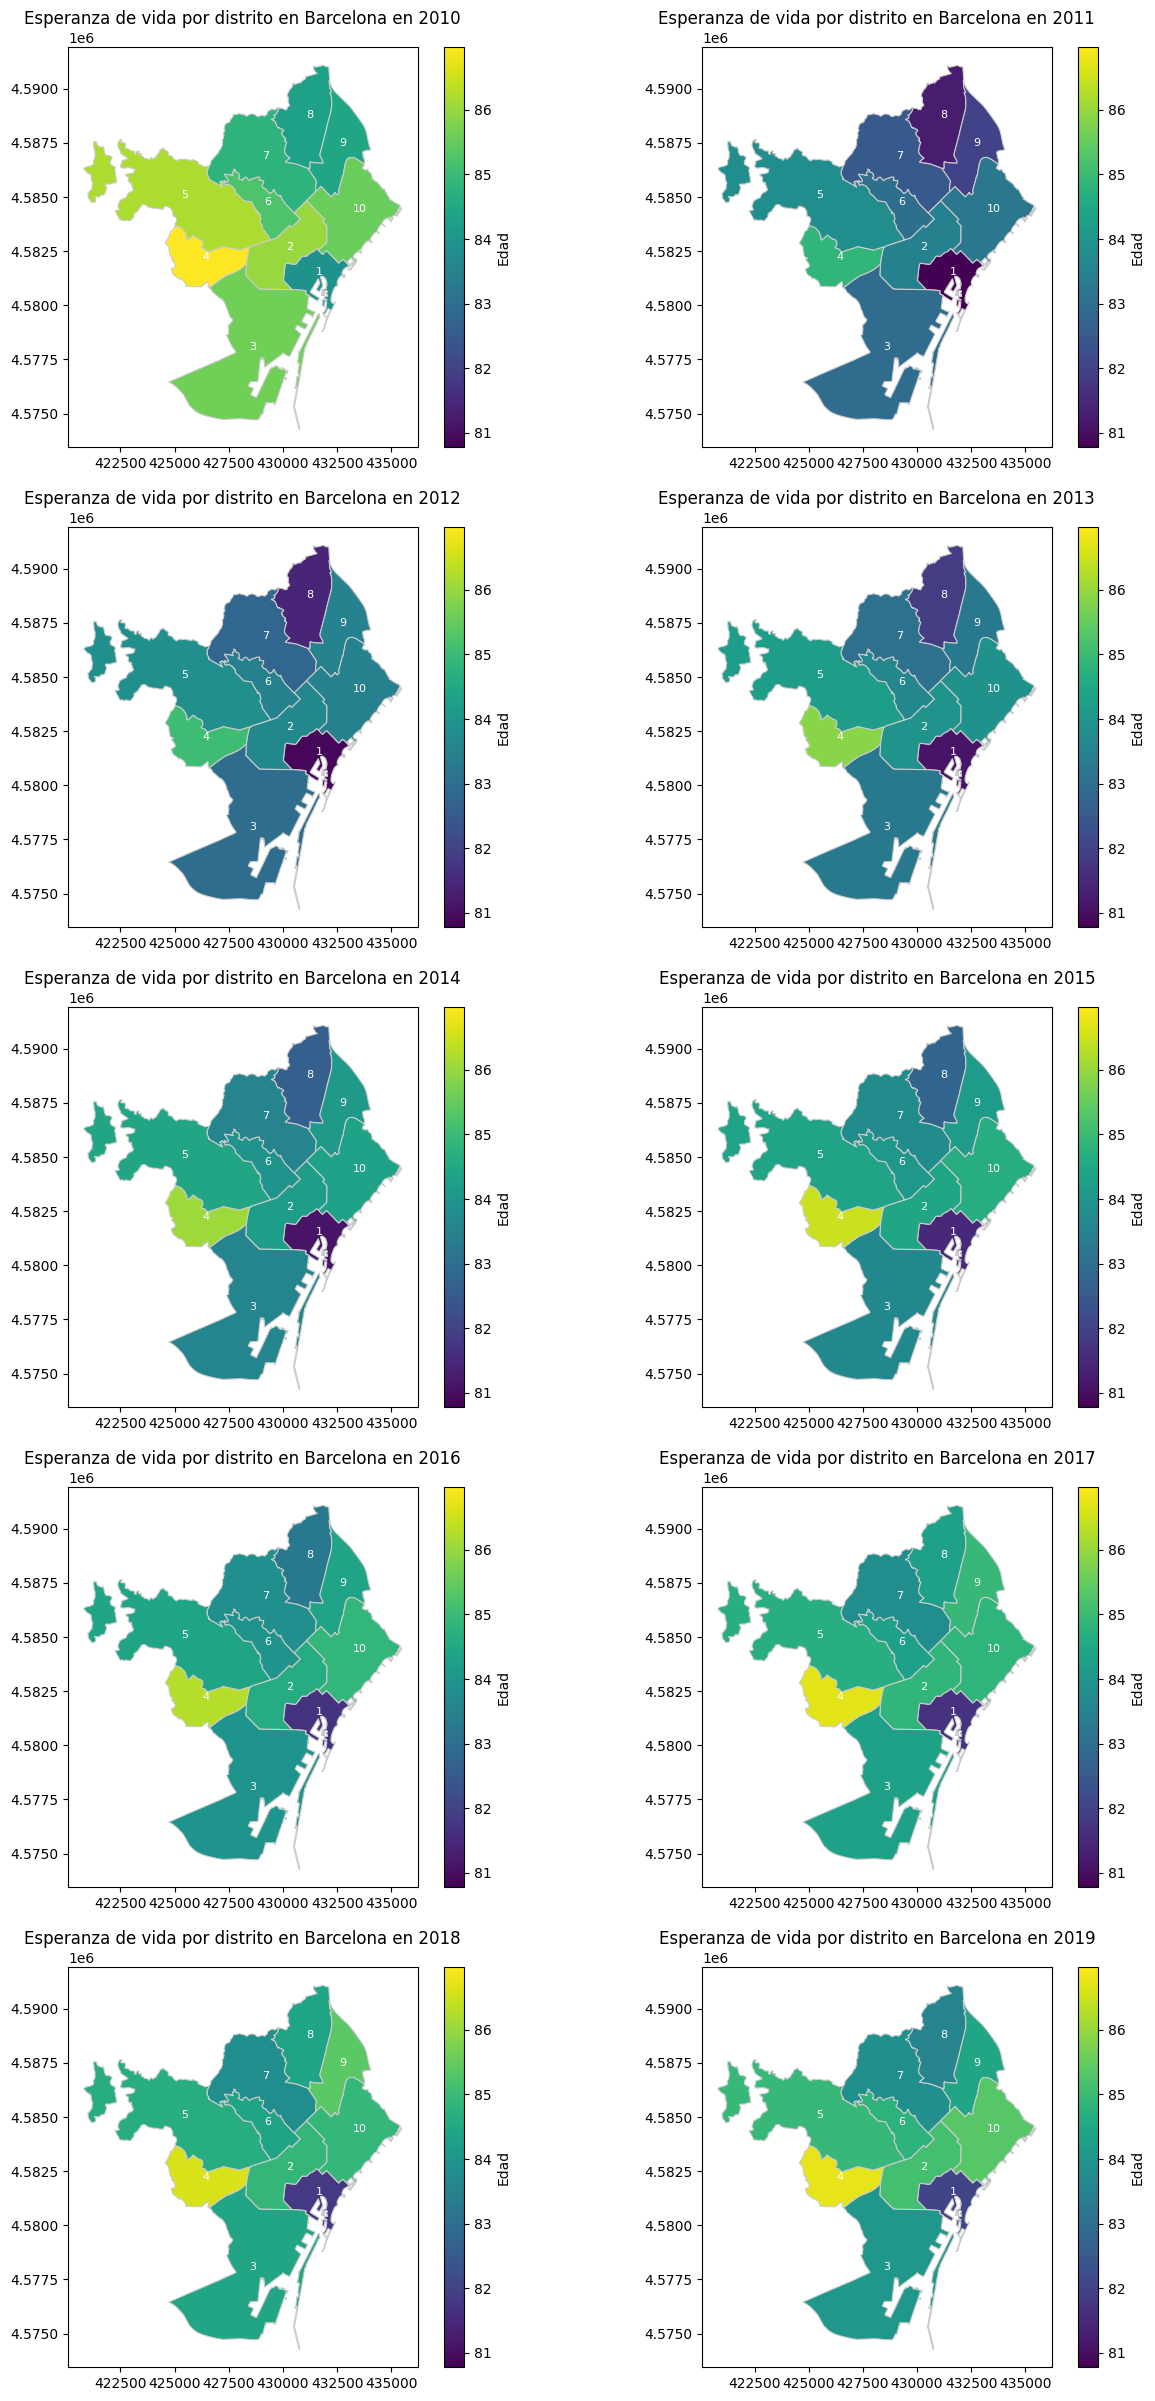

In [24]:
# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 80))

# Definir el valor máximo y mínimo global
max_global = df_anyEspVida['AñosEspVida'].max()
min_global = df_anyEspVida['AñosEspVida'].min()

# Crear un colormap Viridis
viridis_cmap = viridis

# Iterar sobre cada año para crear un gráfico para cada uno
for i, year in enumerate(df_anyEspVida['Any'].unique(), start=1):

    plt.subplot(13, 2, i)
    # Filtrar los datos para el año actual
    datos_year = df_anyEspVida[df_anyEspVida['Any'] == year]

    # Combinar los datos con el shapefile
    distritos_year = barcelona_distritos.merge(datos_year, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Añadir los nombres de los distritos
    for idx, row in barcelona_distritos.iterrows():
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['DISTRICTE'], fontsize=8, color='white')

    # Crear el mapa de los distritos de Barcelona en el año actual con colores
    plt.title(f"Esperanza de vida por distrito en Barcelona en {year}")

    distritos_year.plot(ax=plt.gca(),column='AñosEspVida', cmap=viridis_cmap, linewidth=0.8, edgecolor='0.8', norm=plt.Normalize(vmin=min_global, vmax=max_global))

    # Añadir una barra de color para mostrar la escala
    sm = plt.cm.ScalarMappable(cmap=viridis_cmap, norm=plt.Normalize(vmin=min_global, vmax=max_global))
    sm._A = []
    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('Edad')  # Establece el nombre de la variable

